In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [2]:
# load impressions for 2022
df_q2 = pd.read_csv('../datasets/impressions_q2_extended.csv')
df_q3 = pd.read_csv('../datasets/impressions_q3_extended.csv')

dfs = [df_q2, df_q3]
impressions_df = pd.concat(dfs)

# process date
impressions_df['date'] = impressions_df['first_event_at_iso'].apply(lambda x: np.datetime64(x))
#impressions_df
#impressions_df.head()
print("done")

/tmp/ipykernel_44636/139828481.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  impressions_df['date'] = impressions_df['first_event_at_iso'].apply(lambda x: np.datetime64(x))


done


In [3]:
#impressions_df.head()


In [3]:
# load TRE dataset
df_client_tre = pd.read_csv('../datasets/tre_data.csv')
df_client_tre['Date'] = df_client_tre['Date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
df_client_tre = df_client_tre.rename(columns={"Active View: Average Viewable Time (Seconds)": "avg_viewable_time_seconds"})
print(df_client_tre['Campaign'].value_counts())
print(np.sum(df_client_tre["avg_viewable_time_seconds"]))
df_client_tre

3-Consumer - 2022 - ALWAYS ON PERFORMANCE       117126
3-Consumer-2022-N6_Apple_NPI_iPhonelansering     14633
Name: Campaign, dtype: int64
1682859.23


,Site (CM360),Campaign,Date,Domain,Placement ID,Creative Pixel Size,Impressions,Clicks,Active View: % Viewable Impressions,avg_viewable_time_seconds
0,DBM 3 SE DV360 1565968848-Tre Sverige,3-Consumer - 2022 - ALWAYS ON PERFORMANCE,2022-07-01,adnxs.com,325242770,980x240,168,0,81.55,22.34
1,DBM 3 SE DV360 1565968848-Tre Sverige,3-Consumer - 2022 - ALWAYS ON PERFORMANCE,2022-07-01,adnxs.com,325488187,320x320,7463,24,72.18,8.83
2,DBM 3 SE DV360 1565968848-Tre Sverige,3-Consumer - 2022 - ALWAYS ON PERFORMANCE,2022-07-01,adsenseformobileapps.com,325488187,320x320,20,0,60.00,5.96
3,DBM 3 SE DV360 1565968848-Tre Sverige,3-Consumer - 2022 - ALWAYS ON PERFORMANCE,2022-07-01,advnture.com,325488184,300x600,1,0,0.00,0.00
4,DBM 3 SE DV360 1565968848-Tre Sverige,3-Consumer - 2022 - ALWAYS ON PERFORMANCE,2022-07-01,advnture.com,325488874,300x250,4,0,75.00,9.36
...,...,...,...,...,...,...,...,...,...,...
131754,snapchat.com,3-Consumer-2022-N6_Apple_NPI_iPhonelansering,2022-09-28,snapchat.com,345089502,1x1,0,899,0.00,0.00
131755,snapchat.com,3-Consumer-2022-N6_Apple_NPI_iPhonelansering,2022-09-29,(not set),345089502,1x1,0,80,0.00,0.00
131756,snapchat.com,3-Consumer-2022-N6_Apple_NPI_iPhonelansering,2022-09-29,snapchat.com,345089502,1x1,0,1097,0.00,0.00
131757,snapchat.com,3-Consumer-2022-N6_Apple_NPI_iPhonelansering,2022-09-30,(not set),345089502,1x1,0,50,0.00,0.00


In [4]:
df_client_tre['Creative Pixel Size'].value_counts()

300x250    29354
320x320    24305
300x600    18030
980x240    17411
980x300    15525
250x360    12180
250x600     9817
320x480     2508
980x600     2304
320x400      182
1x1          143
Name: Creative Pixel Size, dtype: int64

In [5]:
# add area into df_client_tre data
def calculate_area(row):
    parts = row['Creative Pixel Size'].split('x')
    width = int(parts[0])
    height = int(parts[1])
    return width * height
    
df_client_tre['area'] = df_client_tre.apply(lambda x: calculate_area(x), axis=1)
df_client_tre = df_client_tre[df_client_tre['area'] != 1]
tre_areas = df_client_tre['area'].unique()

In [6]:
df_client_tre['Campaign'].value_counts()

3-Consumer - 2022 - ALWAYS ON PERFORMANCE       117123
3-Consumer-2022-N6_Apple_NPI_iPhonelansering     14493
Name: Campaign, dtype: int64

In [7]:
# filter specific campaign
#campaign = '3-Consumer - 2022 - ALWAYS ON PERFORMANCE'
campaign = '3-Consumer-2022-N6_Apple_NPI_iPhonelansering'
df_client_tre = df_client_tre[df_client_tre['Campaign'] == campaign]
print(df_client_tre.shape)

campaign_dates = list(df_client_tre['Date'].unique())
print(campaign_dates)

(14493, 11)
[numpy.datetime64('2022-09-09T00:00:00.000000000'), numpy.datetime64('2022-09-10T00:00:00.000000000'), numpy.datetime64('2022-09-11T00:00:00.000000000'), numpy.datetime64('2022-09-12T00:00:00.000000000'), numpy.datetime64('2022-09-13T00:00:00.000000000'), numpy.datetime64('2022-09-14T00:00:00.000000000'), numpy.datetime64('2022-09-15T00:00:00.000000000'), numpy.datetime64('2022-09-16T00:00:00.000000000'), numpy.datetime64('2022-09-17T00:00:00.000000000'), numpy.datetime64('2022-09-18T00:00:00.000000000'), numpy.datetime64('2022-09-19T00:00:00.000000000'), numpy.datetime64('2022-09-20T00:00:00.000000000'), numpy.datetime64('2022-09-21T00:00:00.000000000'), numpy.datetime64('2022-09-22T00:00:00.000000000'), numpy.datetime64('2022-09-23T00:00:00.000000000'), numpy.datetime64('2022-09-24T00:00:00.000000000'), numpy.datetime64('2022-09-25T00:00:00.000000000'), numpy.datetime64('2022-09-26T00:00:00.000000000'), numpy.datetime64('2022-09-27T00:00:00.000000000'), numpy.datetime64('

In [8]:
# filter only Tre hostnames
tre_hostnames = df_client_tre['Domain'].unique()
impressions_df = impressions_df[impressions_df['hostname'].isin(tre_hostnames)]

# filter only impressions in date range of specific campaign
start_date = min(campaign_dates)
end_date = max(campaign_dates)
print(start_date)
print(end_date)
impressions_df = impressions_df.loc[(impressions_df['date'] >= start_date) & (impressions_df['date'] <= end_date)]

# impressions_df = pd.read_csv('../datasets/impressions_12.csv')
impressions_df

2022-09-09T00:00:00.000000000
2022-09-30T00:00:00.000000000


,id,hostname,installation_id,session_id,beacon_type_chosen,ad_technical_format,channel,chosen_brand,ad_width_chosen,ad_height_chosen,...,month_iso,first_event_at_iso,placement_ids,placement_ids_chosen,time_in_screen,scroll_speed,total_fixation_duration,part_year,part_month,date
1478,be149874-7d33-449e-b07e-56767dac3a69,expressen.se,c44b7d57-62e9-45b8-8b48-3bb8224817ad,7df5ce64-2c11-4ece-a7f3-41e6aea61856,ad/bam-ad-slot-div-v1,display,display,elgiganten,180,150,...,2022-09,2022-09-10T01:21:32.542Z,"{""tag_id"":[],""bam_ad_slot"":[""insider"","""",""""]}",NaN,0.000,0.0,0,2022,9,2022-09-10 01:21:32.542
1479,c49fd020-6046-48af-b4df-2656ef376e7e,expressen.se,c44b7d57-62e9-45b8-8b48-3bb8224817ad,7df5ce64-2c11-4ece-a7f3-41e6aea61856,ad/expressen.se-ad-space-v1,display,display,elgiganten,180,150,...,2022-09,2022-09-10T01:21:32.542Z,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",NaN,0.000,0.0,0,2022,9,2022-09-10 01:21:32.542
1480,da68ce90-042d-46d3-ad0c-2bf0bfda8758,expressen.se,c44b7d57-62e9-45b8-8b48-3bb8224817ad,7df5ce64-2c11-4ece-a7f3-41e6aea61856,ad/expressen.se-ad-space-v1,display,display,elgiganten,180,150,...,2022-09,2022-09-10T01:21:32.542Z,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",NaN,0.000,0.0,0,2022,9,2022-09-10 01:21:32.542
1481,77ba6961-ffd4-4aee-9a79-360c27e19fec,expressen.se,c44b7d57-62e9-45b8-8b48-3bb8224817ad,7df5ce64-2c11-4ece-a7f3-41e6aea61856,ad/bam-ad-slot-div-v1,display,display,elgiganten,180,150,...,2022-09,2022-09-10T01:21:32.542Z,"{""tag_id"":[],""bam_ad_slot"":[""outsider"","""",""""]}",NaN,0.000,0.0,0,2022,9,2022-09-10 01:21:32.542
1482,46d60839-25bd-4dee-bdea-756b8dc14f0b,expressen.se,c44b7d57-62e9-45b8-8b48-3bb8224817ad,7df5ce64-2c11-4ece-a7f3-41e6aea61856,ad/expressen.se-ad-space-v1,display,display,elgiganten,180,150,...,2022-09,2022-09-10T01:21:32.542Z,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",NaN,0.000,0.0,0,2022,9,2022-09-10 01:21:32.542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5022058,9a458ddc-4bac-44ab-8caf-6a62ec707d22,hd.se,df8490e5-04d1-4197-99ff-8b2b9a41705a,cd1f7b05-20b2-4bfa-977e-87f61f0e3708,ad/bam-ad-slot-div-v1,display,display,NaN,980,240,...,2022-09,2022-09-19T07:48:19.072Z,"{""tag_id"":[],""bam_ad_slot"":[""panorama"",""4"",""pa...",NaN,0.000,0.0,0,2022,9,2022-09-19 07:48:19.072
5022059,95f85b1f-0b3f-4829-b5c2-47517f4c2f00,hd.se,df8490e5-04d1-4197-99ff-8b2b9a41705a,cd1f7b05-20b2-4bfa-977e-87f61f0e3708,ad/bam-ad-slot-div-v1,display,display,NaN,300,250,...,2022-09,2022-09-19T07:48:19.072Z,"{""tag_id"":[],""bam_ad_slot"":[""outsider"",""6"",""ou...",NaN,0.000,0.0,0,2022,9,2022-09-19 07:48:19.072
5022060,d4ba5d6f-846d-4cdf-b356-04cc035d9944,hd.se,df8490e5-04d1-4197-99ff-8b2b9a41705a,cd1f7b05-20b2-4bfa-977e-87f61f0e3708,ad/bam-ad-slot-div-v1,display,display,NaN,980,240,...,2022-09,2022-09-19T07:48:19.075Z,"{""tag_id"":[],""bam_ad_slot"":[""panorama"",""6"",""pa...",NaN,0.000,0.0,0,2022,9,2022-09-19 07:48:19.075
5022061,3da716ca-77df-4323-8dcf-2c082173a20d,hd.se,df8490e5-04d1-4197-99ff-8b2b9a41705a,cd1f7b05-20b2-4bfa-977e-87f61f0e3708,ad/bam-ad-slot-div-v1,display,display,NaN,180,150,...,2022-09,2022-09-19T07:48:19.075Z,"{""tag_id"":[],""bam_ad_slot"":[""mob"","""",""""]}",NaN,0.000,0.0,0,2022,9,2022-09-19 07:48:19.075


In [9]:
df_client_tre['Date'].value_counts()

2022-09-19    726
2022-09-26    713
2022-09-22    713
2022-09-12    711
2022-09-28    700
2022-09-27    700
2022-09-16    699
2022-09-14    698
2022-09-13    695
2022-09-21    687
2022-09-18    685
2022-09-29    684
2022-09-17    675
2022-09-30    673
2022-09-23    669
2022-09-20    668
2022-09-15    663
2022-09-25    647
2022-09-24    617
2022-09-11    560
2022-09-10    500
2022-09-09    410
Name: Date, dtype: int64

In [10]:
np.sum(df_client_tre["avg_viewable_time_seconds"])

142229.83

In [11]:
# adding size column
def get_impression_size(row):
    return f"{row['ad_width_chosen']}x{row['ad_height_chosen']}"

def get_impression_area(row):
    return row['ad_width_chosen'] * row['ad_height_chosen']

impressions_df['size'] = impressions_df.apply(lambda x: get_impression_size(x), axis=1)
impressions_df['area'] = impressions_df.apply(lambda x: get_impression_area(x), axis=1)
impressions_df

,id,hostname,installation_id,session_id,beacon_type_chosen,ad_technical_format,channel,chosen_brand,ad_width_chosen,ad_height_chosen,...,placement_ids,placement_ids_chosen,time_in_screen,scroll_speed,total_fixation_duration,part_year,part_month,date,size,area
1478,be149874-7d33-449e-b07e-56767dac3a69,expressen.se,c44b7d57-62e9-45b8-8b48-3bb8224817ad,7df5ce64-2c11-4ece-a7f3-41e6aea61856,ad/bam-ad-slot-div-v1,display,display,elgiganten,180,150,...,"{""tag_id"":[],""bam_ad_slot"":[""insider"","""",""""]}",NaN,0.000,0.0,0,2022,9,2022-09-10 01:21:32.542,180x150,27000
1479,c49fd020-6046-48af-b4df-2656ef376e7e,expressen.se,c44b7d57-62e9-45b8-8b48-3bb8224817ad,7df5ce64-2c11-4ece-a7f3-41e6aea61856,ad/expressen.se-ad-space-v1,display,display,elgiganten,180,150,...,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",NaN,0.000,0.0,0,2022,9,2022-09-10 01:21:32.542,180x150,27000
1480,da68ce90-042d-46d3-ad0c-2bf0bfda8758,expressen.se,c44b7d57-62e9-45b8-8b48-3bb8224817ad,7df5ce64-2c11-4ece-a7f3-41e6aea61856,ad/expressen.se-ad-space-v1,display,display,elgiganten,180,150,...,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",NaN,0.000,0.0,0,2022,9,2022-09-10 01:21:32.542,180x150,27000
1481,77ba6961-ffd4-4aee-9a79-360c27e19fec,expressen.se,c44b7d57-62e9-45b8-8b48-3bb8224817ad,7df5ce64-2c11-4ece-a7f3-41e6aea61856,ad/bam-ad-slot-div-v1,display,display,elgiganten,180,150,...,"{""tag_id"":[],""bam_ad_slot"":[""outsider"","""",""""]}",NaN,0.000,0.0,0,2022,9,2022-09-10 01:21:32.542,180x150,27000
1482,46d60839-25bd-4dee-bdea-756b8dc14f0b,expressen.se,c44b7d57-62e9-45b8-8b48-3bb8224817ad,7df5ce64-2c11-4ece-a7f3-41e6aea61856,ad/expressen.se-ad-space-v1,display,display,elgiganten,180,150,...,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",NaN,0.000,0.0,0,2022,9,2022-09-10 01:21:32.542,180x150,27000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5022058,9a458ddc-4bac-44ab-8caf-6a62ec707d22,hd.se,df8490e5-04d1-4197-99ff-8b2b9a41705a,cd1f7b05-20b2-4bfa-977e-87f61f0e3708,ad/bam-ad-slot-div-v1,display,display,NaN,980,240,...,"{""tag_id"":[],""bam_ad_slot"":[""panorama"",""4"",""pa...",NaN,0.000,0.0,0,2022,9,2022-09-19 07:48:19.072,980x240,235200
5022059,95f85b1f-0b3f-4829-b5c2-47517f4c2f00,hd.se,df8490e5-04d1-4197-99ff-8b2b9a41705a,cd1f7b05-20b2-4bfa-977e-87f61f0e3708,ad/bam-ad-slot-div-v1,display,display,NaN,300,250,...,"{""tag_id"":[],""bam_ad_slot"":[""outsider"",""6"",""ou...",NaN,0.000,0.0,0,2022,9,2022-09-19 07:48:19.072,300x250,75000
5022060,d4ba5d6f-846d-4cdf-b356-04cc035d9944,hd.se,df8490e5-04d1-4197-99ff-8b2b9a41705a,cd1f7b05-20b2-4bfa-977e-87f61f0e3708,ad/bam-ad-slot-div-v1,display,display,NaN,980,240,...,"{""tag_id"":[],""bam_ad_slot"":[""panorama"",""6"",""pa...",NaN,0.000,0.0,0,2022,9,2022-09-19 07:48:19.075,980x240,235200
5022061,3da716ca-77df-4323-8dcf-2c082173a20d,hd.se,df8490e5-04d1-4197-99ff-8b2b9a41705a,cd1f7b05-20b2-4bfa-977e-87f61f0e3708,ad/bam-ad-slot-div-v1,display,display,NaN,180,150,...,"{""tag_id"":[],""bam_ad_slot"":[""mob"","""",""""]}",NaN,0.000,0.0,0,2022,9,2022-09-19 07:48:19.075,180x150,27000


In [12]:
import json

def extract_pid(placement_id):
    placement_id = json.loads(placement_id)
#     print(placement_id)
    bam_ad_slots = placement_id["bam_ad_slot"]
    final_bam_ad_slots = [bas for bas in bam_ad_slots if bas.strip() != '']
    try:
        ret = placement_id['tag_id'][0]
    except:
#         print('empty pid')
        return
    ret += ','.join([bas for bas in final_bam_ad_slots])
    return ret
    
def len_pids(placement_id):
    placement_id = json.loads(placement_id)
    bam_ad_slots = placement_id["bam_ad_slot"]
    final_bam_ad_slots = [bas for bas in bam_ad_slots if bas.strip() != '']
    return len(placement_id["tag_id"]) + len(final_bam_ad_slots)

def pid_type(pid):
    try:
        int(pid)
        return 'int'
    except:
        return 'str'

impressions_df['pid'] = impressions_df['placement_ids'].apply(extract_pid)
impressions_df['pid_len'] = impressions_df['placement_ids'].apply(len_pids)
impressions_df['pid_type'] = impressions_df['pid'].apply(pid_type)

In [13]:
# filter only impressions with int placement IDs
# impressions_df = impressions_df[impressions_df['pid_type'] == 'int']
# impressions_df['pid'] = impressions_df['pid'].apply(lambda pid: int(pid))
# impressions_df.head()

In [14]:
# run through predictions
import os
import json

def _get_pred_map():
    pred_map = dict()
    
    for i in range(1, 13):
        if i < 10:
            i = f'0{i}'
        for day in os.listdir(f'../predictions/2022/{i}'):
            for h in os.listdir(f'../predictions/2022/{i}/{day}'):
                if not h.endswith('.ndjson'):
                    continue
                with open(f'../predictions/2022/{i}/{day}/{h}')as f:
                    for line in f.readlines():
                        json_line = json.loads(line)
                        id_ = json_line['id']
                        pred_map[id_] = json_line['prediction']
    return pred_map
                            
pred_map = _get_pred_map()

In [15]:
def _get_final_fixation(gaze_valid, is_fixated, id_, pred_map):
    if gaze_valid:
        return is_fixated
    if id_ in pred_map:
        return pred_map[id_]
    return False

impressions_df['final_fixation'] = impressions_df.apply(lambda row: _get_final_fixation(row['gaze_valid'], row['is_fixated'], row['id'], pred_map), axis=1)
impressions_df

,id,hostname,installation_id,session_id,beacon_type_chosen,ad_technical_format,channel,chosen_brand,ad_width_chosen,ad_height_chosen,...,total_fixation_duration,part_year,part_month,date,size,area,pid,pid_len,pid_type,final_fixation
1478,be149874-7d33-449e-b07e-56767dac3a69,expressen.se,c44b7d57-62e9-45b8-8b48-3bb8224817ad,7df5ce64-2c11-4ece-a7f3-41e6aea61856,ad/bam-ad-slot-div-v1,display,display,elgiganten,180,150,...,0,2022,9,2022-09-10 01:21:32.542,180x150,27000,None,1,str,False
1479,c49fd020-6046-48af-b4df-2656ef376e7e,expressen.se,c44b7d57-62e9-45b8-8b48-3bb8224817ad,7df5ce64-2c11-4ece-a7f3-41e6aea61856,ad/expressen.se-ad-space-v1,display,display,elgiganten,180,150,...,0,2022,9,2022-09-10 01:21:32.542,180x150,27000,None,0,str,False
1480,da68ce90-042d-46d3-ad0c-2bf0bfda8758,expressen.se,c44b7d57-62e9-45b8-8b48-3bb8224817ad,7df5ce64-2c11-4ece-a7f3-41e6aea61856,ad/expressen.se-ad-space-v1,display,display,elgiganten,180,150,...,0,2022,9,2022-09-10 01:21:32.542,180x150,27000,None,0,str,False
1481,77ba6961-ffd4-4aee-9a79-360c27e19fec,expressen.se,c44b7d57-62e9-45b8-8b48-3bb8224817ad,7df5ce64-2c11-4ece-a7f3-41e6aea61856,ad/bam-ad-slot-div-v1,display,display,elgiganten,180,150,...,0,2022,9,2022-09-10 01:21:32.542,180x150,27000,None,1,str,False
1482,46d60839-25bd-4dee-bdea-756b8dc14f0b,expressen.se,c44b7d57-62e9-45b8-8b48-3bb8224817ad,7df5ce64-2c11-4ece-a7f3-41e6aea61856,ad/expressen.se-ad-space-v1,display,display,elgiganten,180,150,...,0,2022,9,2022-09-10 01:21:32.542,180x150,27000,None,0,str,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5022058,9a458ddc-4bac-44ab-8caf-6a62ec707d22,hd.se,df8490e5-04d1-4197-99ff-8b2b9a41705a,cd1f7b05-20b2-4bfa-977e-87f61f0e3708,ad/bam-ad-slot-div-v1,display,display,NaN,980,240,...,0,2022,9,2022-09-19 07:48:19.072,980x240,235200,None,3,str,False
5022059,95f85b1f-0b3f-4829-b5c2-47517f4c2f00,hd.se,df8490e5-04d1-4197-99ff-8b2b9a41705a,cd1f7b05-20b2-4bfa-977e-87f61f0e3708,ad/bam-ad-slot-div-v1,display,display,NaN,300,250,...,0,2022,9,2022-09-19 07:48:19.072,300x250,75000,None,3,str,False
5022060,d4ba5d6f-846d-4cdf-b356-04cc035d9944,hd.se,df8490e5-04d1-4197-99ff-8b2b9a41705a,cd1f7b05-20b2-4bfa-977e-87f61f0e3708,ad/bam-ad-slot-div-v1,display,display,NaN,980,240,...,0,2022,9,2022-09-19 07:48:19.075,980x240,235200,None,3,str,False
5022061,3da716ca-77df-4323-8dcf-2c082173a20d,hd.se,df8490e5-04d1-4197-99ff-8b2b9a41705a,cd1f7b05-20b2-4bfa-977e-87f61f0e3708,ad/bam-ad-slot-div-v1,display,display,NaN,180,150,...,0,2022,9,2022-09-19 07:48:19.075,180x150,27000,None,1,str,False


In [16]:
def get_nearest_area(row, areas):
    min_idx = np.argmin(np.absolute(row['area'] - areas), axis=0)
    return areas[min_idx]
    
impressions_df['modified_area'] = impressions_df.apply(lambda x: get_nearest_area(x, tre_areas), axis=1)
impressions_df

,id,hostname,installation_id,session_id,beacon_type_chosen,ad_technical_format,channel,chosen_brand,ad_width_chosen,ad_height_chosen,...,part_year,part_month,date,size,area,pid,pid_len,pid_type,final_fixation,modified_area
1478,be149874-7d33-449e-b07e-56767dac3a69,expressen.se,c44b7d57-62e9-45b8-8b48-3bb8224817ad,7df5ce64-2c11-4ece-a7f3-41e6aea61856,ad/bam-ad-slot-div-v1,display,display,elgiganten,180,150,...,2022,9,2022-09-10 01:21:32.542,180x150,27000,None,1,str,False,75000
1479,c49fd020-6046-48af-b4df-2656ef376e7e,expressen.se,c44b7d57-62e9-45b8-8b48-3bb8224817ad,7df5ce64-2c11-4ece-a7f3-41e6aea61856,ad/expressen.se-ad-space-v1,display,display,elgiganten,180,150,...,2022,9,2022-09-10 01:21:32.542,180x150,27000,None,0,str,False,75000
1480,da68ce90-042d-46d3-ad0c-2bf0bfda8758,expressen.se,c44b7d57-62e9-45b8-8b48-3bb8224817ad,7df5ce64-2c11-4ece-a7f3-41e6aea61856,ad/expressen.se-ad-space-v1,display,display,elgiganten,180,150,...,2022,9,2022-09-10 01:21:32.542,180x150,27000,None,0,str,False,75000
1481,77ba6961-ffd4-4aee-9a79-360c27e19fec,expressen.se,c44b7d57-62e9-45b8-8b48-3bb8224817ad,7df5ce64-2c11-4ece-a7f3-41e6aea61856,ad/bam-ad-slot-div-v1,display,display,elgiganten,180,150,...,2022,9,2022-09-10 01:21:32.542,180x150,27000,None,1,str,False,75000
1482,46d60839-25bd-4dee-bdea-756b8dc14f0b,expressen.se,c44b7d57-62e9-45b8-8b48-3bb8224817ad,7df5ce64-2c11-4ece-a7f3-41e6aea61856,ad/expressen.se-ad-space-v1,display,display,elgiganten,180,150,...,2022,9,2022-09-10 01:21:32.542,180x150,27000,None,0,str,False,75000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5022058,9a458ddc-4bac-44ab-8caf-6a62ec707d22,hd.se,df8490e5-04d1-4197-99ff-8b2b9a41705a,cd1f7b05-20b2-4bfa-977e-87f61f0e3708,ad/bam-ad-slot-div-v1,display,display,NaN,980,240,...,2022,9,2022-09-19 07:48:19.072,980x240,235200,None,3,str,False,235200
5022059,95f85b1f-0b3f-4829-b5c2-47517f4c2f00,hd.se,df8490e5-04d1-4197-99ff-8b2b9a41705a,cd1f7b05-20b2-4bfa-977e-87f61f0e3708,ad/bam-ad-slot-div-v1,display,display,NaN,300,250,...,2022,9,2022-09-19 07:48:19.072,300x250,75000,None,3,str,False,75000
5022060,d4ba5d6f-846d-4cdf-b356-04cc035d9944,hd.se,df8490e5-04d1-4197-99ff-8b2b9a41705a,cd1f7b05-20b2-4bfa-977e-87f61f0e3708,ad/bam-ad-slot-div-v1,display,display,NaN,980,240,...,2022,9,2022-09-19 07:48:19.075,980x240,235200,None,3,str,False,235200
5022061,3da716ca-77df-4323-8dcf-2c082173a20d,hd.se,df8490e5-04d1-4197-99ff-8b2b9a41705a,cd1f7b05-20b2-4bfa-977e-87f61f0e3708,ad/bam-ad-slot-div-v1,display,display,NaN,180,150,...,2022,9,2022-09-19 07:48:19.075,180x150,27000,None,1,str,False,75000


In [17]:
# TODO: filter out impressions with huge diff between area and modified_area
# impressions_df = impressions_df[np.absolute(impressions_df['area'] - impressions_df['modified_area']) < 40000]
# impressions_df

In [18]:
# groupby and aggregate
grouped_df = impressions_df.groupby(['hostname', 'modified_area']).apply(
    lambda x: pd.Series(
        {
            'num_impressions' : x['id'].count(),
            'num_fixations': x.loc[x['final_fixation'], 'id'].count(),
            'in_screen': np.sum(x['is_iab_inview'])
        }
    )
)
grouped_df

num_impressions  num_fixations  in_screen
hostname           modified_area                                           
affarsvarlden.se   75000                       66              0          0
                   90000                      196              5        150
                   102400                      45              2         19
                   128000                       8              1          1
                   235200                      40             11         31
...                                           ...            ...        ...
wellness.se        294000                      29              4          2
ystadsallehanda.se 75000                       18              0          3
                   90000                       10              0          4
                   128000                      13              1          4
                   294000                      11              3          3

[638 rows x 3 columns]

In [19]:
#grouped_df["fix_imp_ratio"] = round(grouped_df["num_fixations"] / grouped_df["num_impressions"] * 100, 4)
#grouped_df
# print(round(grouped_df['num_fixations'] / grouped_df['in_screen'] * 100, 4))

In [20]:
grouped_df['fix/imp_ratio'] = round(grouped_df['num_fixations'] / grouped_df['num_impressions'] * 100, 4)
grouped_df['fix/screen_ratio'] = round(grouped_df['num_fixations'] / grouped_df['in_screen'] * 100, 4)
# Total fixation rate summary in seconds per impression
grouped_df = grouped_df.reset_index()
grouped_df

,hostname,modified_area,num_impressions,num_fixations,in_screen,fix/imp_ratio,fix/screen_ratio
0,affarsvarlden.se,75000,66,0,0,0.0000,NaN
1,affarsvarlden.se,90000,196,5,150,2.5510,3.3333
2,affarsvarlden.se,102400,45,2,19,4.4444,10.5263
3,affarsvarlden.se,128000,8,1,1,12.5000,100.0000
4,affarsvarlden.se,235200,40,11,31,27.5000,35.4839
...,...,...,...,...,...,...,...
633,wellness.se,294000,29,4,2,13.7931,200.0000
634,ystadsallehanda.se,75000,18,0,3,0.0000,0.0000
635,ystadsallehanda.se,90000,10,0,4,0.0000,0.0000
636,ystadsallehanda.se,128000,13,1,4,7.6923,25.0000


In [21]:
grouped_df["fix/screen_ratio"] = grouped_df["fix/screen_ratio"].fillna(0)
#plt.figure(figsize=(15, 10))
#plt.hist(grouped_df['ratio'])
#plt.show()
grouped_df

,hostname,modified_area,num_impressions,num_fixations,in_screen,fix/imp_ratio,fix/screen_ratio
0,affarsvarlden.se,75000,66,0,0,0.0000,0.0000
1,affarsvarlden.se,90000,196,5,150,2.5510,3.3333
2,affarsvarlden.se,102400,45,2,19,4.4444,10.5263
3,affarsvarlden.se,128000,8,1,1,12.5000,100.0000
4,affarsvarlden.se,235200,40,11,31,27.5000,35.4839
...,...,...,...,...,...,...,...
633,wellness.se,294000,29,4,2,13.7931,200.0000
634,ystadsallehanda.se,75000,18,0,3,0.0000,0.0000
635,ystadsallehanda.se,90000,10,0,4,0.0000,0.0000
636,ystadsallehanda.se,128000,13,1,4,7.6923,25.0000


In [22]:
# result_df = grouped_df.groupby('hostname').apply(lambda x: np.average(x['ratio'], weights=x['num_impressions']))
# result_df

# groupby and aggregate
#result_df = grouped_df.groupby(['hostname']).apply(
#    lambda x: pd.Series(
#        {
#            'fixation_ratio' : np.average(x['fix/imp_ratio'], weights=(x['num_fixations'] | 1)),
#            'fix_imp_ratio': np.average(x['fix_imp_ratio']),
#            'num_impressions': np.sum(x['num_impressions']),
#            'num_fixations': np.sum(x['num_fixations']),
#        }
#    )
#)
result_df = grouped_df.groupby(['hostname']).apply(
    lambda x: pd.Series(
        {
            'fixation_ratio' : np.average(x['fix/screen_ratio']),
            'fixation_impression_ratio': np.average(x['fix/imp_ratio'], weights=x['num_impressions']),
            'num_impressions': np.sum(x['num_impressions']),
            'num_fixations': np.sum(x['num_fixations']),
        }
    )
)
result_df = result_df.reset_index()
result_df

,hostname,fixation_ratio,fixation_impression_ratio,num_impressions,num_fixations
0,affarsvarlden.se,27.163317,5.057457,435.0,22.0
1,aftonbladet.se,40.007083,14.890190,123222.0,18348.0
2,aikhockey.se,33.333333,7.142850,14.0,1.0
3,allabolag.se,62.346383,13.172259,4221.0,556.0
4,allas.se,150.885720,48.979576,196.0,96.0
...,...,...,...,...,...
147,vikhockey.se,0.000000,0.000000,3.0,0.0
148,vk.se,37.500000,6.315785,95.0,6.0
149,vlt.se,61.584650,14.645320,3496.0,512.0
150,wellness.se,82.222233,15.277776,72.0,11.0


In [23]:
def get_sample_size(num_impressions):
    if num_impressions <= 20:
        return "low"
    elif num_impressions > 20 and num_impressions <= 100:
        return "medium"
    else:
        return "high"
    
result_df['sample_size'] = result_df['num_impressions'].apply(lambda num_impressions: get_sample_size(num_impressions))
result_df

,hostname,fixation_ratio,fixation_impression_ratio,num_impressions,num_fixations,sample_size
0,affarsvarlden.se,27.163317,5.057457,435.0,22.0,high
1,aftonbladet.se,40.007083,14.890190,123222.0,18348.0,high
2,aikhockey.se,33.333333,7.142850,14.0,1.0,low
3,allabolag.se,62.346383,13.172259,4221.0,556.0,high
4,allas.se,150.885720,48.979576,196.0,96.0,high
...,...,...,...,...,...,...
147,vikhockey.se,0.000000,0.000000,3.0,0.0,low
148,vk.se,37.500000,6.315785,95.0,6.0,medium
149,vlt.se,61.584650,14.645320,3496.0,512.0,high
150,wellness.se,82.222233,15.277776,72.0,11.0,medium


In [24]:
result_df['sample_size'].value_counts()

high      77
medium    44
low       31
Name: sample_size, dtype: int64

In [25]:
print(np.sum(result_df["num_fixations"]))
print(np.sum(df_client_tre["avg_viewable_time_seconds"]))
print((np.sum(result_df["num_fixations"]) / np.sum(df_client_tre["avg_viewable_time_seconds"])) * 100)

59062.0
142229.83
41.52574744693149


In [26]:
result_df = result_df[['hostname', 'fixation_ratio', 'fixation_impression_ratio','sample_size']]
result_df

,hostname,fixation_ratio,fixation_impression_ratio,sample_size
0,affarsvarlden.se,27.163317,5.057457,high
1,aftonbladet.se,40.007083,14.890190,high
2,aikhockey.se,33.333333,7.142850,low
3,allabolag.se,62.346383,13.172259,high
4,allas.se,150.885720,48.979576,high
...,...,...,...,...
147,vikhockey.se,0.000000,0.000000,low
148,vk.se,37.500000,6.315785,medium
149,vlt.se,61.584650,14.645320,high
150,wellness.se,82.222233,15.277776,medium


In [27]:
result_df.to_csv('stefan_tre_report_v6_iphone.csv', index=False)

ValueError: supplied range of [0.0, inf] is not finite

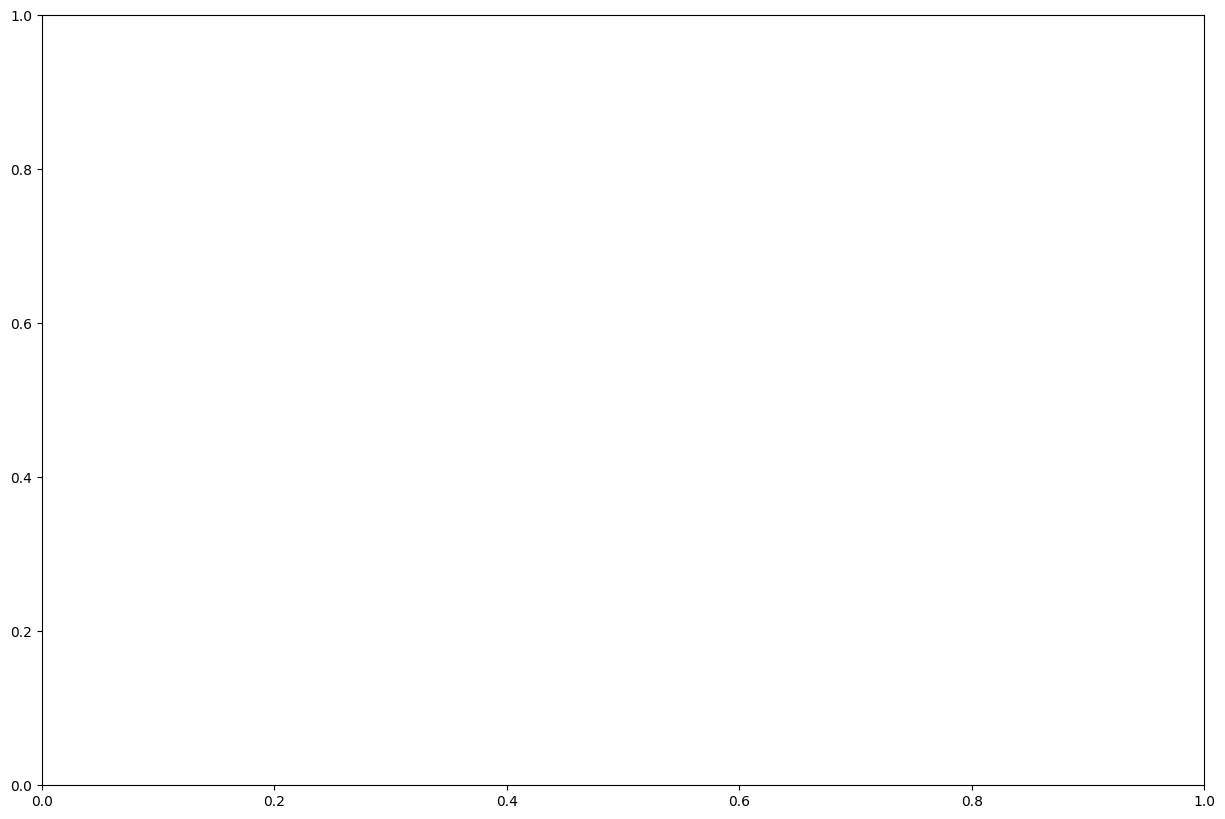

In [28]:
plt.figure(figsize=(15, 10))
plt.hist(result_df['fixation_ratio'])
plt.show()